In [571]:
import numpy as np
import matplotlib.pyplot as plt
import math
from copy import deepcopy

In [572]:
#Definition of global parameters
Niter=1000
M=20
delta=0.003   #1/((M/2)-1)
w_1=1.
m=np.arange(1,M+1)
epsilon=0.001
Delta=1.
g=np.arange(0,2,0.01) 

#colors for the plotting
c1='#140b34'
c2='#84206b'
c3='#e55c30'
c4='#f6d746'
colors=[c3, c2, c4, c1]

#Definition of final lists for 1st parametrization (f_m = -c_k/(W+w_k) ; l_m = c_k*epsilon_r/(w_k*(W+w_k))
epsilon_r_final_param1=[]
Delta_r_final_param1=[]
E_gs_final_param1=[]
sigma_x_med_param1=[]
sigma_z_med_param1=[]
eps_W1=[]

#Definition of final lists for 2nd parametrization (f_m = -c_k/w_k ; l_m = 0)
epsilon_r_final_param2=[]
Delta_r_final_param2=[]
E_gs_final_param2=[]
sigma_x_med_param2=[]
sigma_z_med_param2=[]
eps_W2=[]

#Definition of the difference of Egs between 1st and 2nd parametrization for the evaluation
deltaE_gs_12=[]

#Definition of real final lists (chosen between 1st and 2nd parametrization)
epsilon_r_final=[]
Delta_r_final=[]
E_gs_final=[]
sigma_x_med=[]
sigma_z_med=[]


In [573]:
def eigenvalue(Del,eps): #def W
    return np.sqrt(Del**2 + eps**2)

#print(eigenvalue(Delta,epsilon))
#print(np.sqrt(1**2 + 0.1**2))

In [574]:
def coupling_m(n,coup): #def g_m
    return coup*np.sin(n*np.pi/2.)*np.sqrt(n)/(1.+delta*(n-1.))

#print(coupling_m(m,0.2))
#print(0.2*np.sin(3*np.pi/2.)*np.sqrt(3)/(1.+delta*(3-1.)))

In [575]:
def f_variational_param1(n,coup,Del,eps): #def f_m
    return -coupling_m(n,coup)/(eigenvalue(Del,eps)+n*w_1)

#print(f_variational(m,0.2,Delta,epsilon))
#print(-coupling_m(3,0.2)/(eigenvalue(Delta,epsilon)+3*w_1))

In [576]:
def f_variational_param2(n,coup,Del,eps): #def f_m
    return -coupling_m(n,coup)/(n*w_1)

In [577]:
def l_variational_param1(n,coup,Del,eps): #def l_m
    step=(coupling_m(n,coup)*eps)/(n*w_1*(eigenvalue(Del,eps)+n*w_1))
    #step=[x for x in step if math.isnan(x) == False]
    return step

#print(l_variational(m,0.2,Delta,epsilon)) #PROBLEMA - El primer término es un "nan" y entonces me dará problemas después
#print((coupling_m(3,0.2)*epsilon)/(3*w_1*(eigenvalue(Delta,epsilon)+3*w_1)))

In [578]:
def l_variational_param2(n,coup,Del,eps): #def l_m
    x=0
    return x

In [579]:
def energy_gs_param1(n,coup,Del,eps): #def E_gs
    #np.seterr(invalid='ignore')
    term_1=coupling_m(n,coup)*f_variational_param1(n,coup,Del,eps)
    #print(term_1)
    term_2=n*w_1*((f_variational_param1(n,coup,Del,eps)**2)+(l_variational_param1(n,coup,Del,eps)**2))
    #print(term_2)
    sum_1=np.nansum(term_1)
    #print(sum_1)
    sum_2=np.nansum(term_2)
    #print(sum_2)   #-   PROBLEMA - El primer término de term_2 es un "nan" y entonces sum_2 sale nan y el resultado nan
    return -(eigenvalue(Del,eps)/2)+2*sum_1+sum_2

#print(energy_gs(m,0.83,0.08,0.22))
#print(-(eigenvalue(Delta,epsilon)/2)+2*np.nansum(coupling_m(m,0.2)*f_variational(m,0.2,Delta,epsilon))+np.nansum(m*w_1*((f_variational(m,0.2,Delta,epsilon)**2)+(l_variational(m,0.2,Delta,epsilon)**2))))

In [580]:
def energy_gs_param2(n,coup,Del,eps): #def E_gs
    #np.seterr(invalid='ignore')
    term_1=coupling_m(n,coup)*f_variational_param2(n,coup,Del,eps)
    #print(term_1)
    term_2=n*w_1*((f_variational_param2(n,coup,Del,eps)**2)+(l_variational_param2(n,coup,Del,eps)**2))
    #print(term_2)
    sum_1=np.nansum(term_1)
    #print(sum_1)
    sum_2=np.nansum(term_2)
    #print(sum_2)   #-   PROBLEMA - El primer término de term_2 es un "nan" y entonces sum_2 sale nan y el resultado nan
    return -(eigenvalue(Del,eps)/2)+2*sum_1+sum_2

In [581]:
def f_Delta_r_param1(n,coup,Del,eps):
    f_m=f_variational_param1(n,coup,Del,eps)
    patata_1=f_m**2
    return Delta*math.exp(-2*np.nansum(patata_1))

In [582]:
def f_Delta_r_param2(n,coup,Del,eps):
    f_m=f_variational_param2(n,coup,Del,eps)
    patata_1=f_m**2
    return Delta*math.exp(-2*np.nansum(patata_1))

In [583]:
def f_epsilon_r_param1(n,coup,Del,eps):
    g_m=coupling_m(n,coup)
    f_m=f_variational_param1(n,coup,Del,eps)
    l_m=l_variational_param1(n,coup,Del,eps)
    patata_2=l_m*(g_m+m*w_1*f_m)
    return epsilon+4*np.nansum(patata_2)

In [584]:
def f_epsilon_r_param2(n,coup,Del,eps):
    g_m=coupling_m(n,coup)
    f_m=f_variational_param2(n,coup,Del,eps)
    l_m=l_variational_param2(n,coup,Del,eps)
    patata_2=l_m*(g_m+m*w_1*f_m)
    return epsilon+4*np.nansum(patata_2)

In [585]:
def er_relative(eps,Del):
    return eps/eigenvalue(Del,eps)

In [586]:
k=0
for i in range(np.size(g)):
    #Initialization
    g_aux=g[i]
    print("g",k,"=",g_aux)
    
    Delta_r_aux_1=deepcopy(Delta)
    epsilon_r_aux_1=deepcopy(epsilon)
    
    Delta_r_aux_2=deepcopy(Delta)
    epsilon_r_aux_2=deepcopy(epsilon)

    #It makes the process once to obtain 2 first values of each Delta_r and epsilon_r to compare the error
    Delta_r_1=deepcopy(f_Delta_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
    epsilon_r_1=deepcopy(f_epsilon_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        
    Delta_r_2=deepcopy(f_Delta_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    epsilon_r_2=deepcopy(f_epsilon_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    
    #Assignments
    Delta_r_old_1=deepcopy(Delta_r_aux_1)
    epsilon_r_old_1=deepcopy(epsilon_r_aux_1)
    Delta_r_aux_1=deepcopy(Delta_r_1)
    epsilon_r_aux_1=deepcopy(epsilon_r_1)
    
    Err_Delta_1=deepcopy(np.sqrt(abs(Delta_r_aux_1-Delta_r_old_1)**2))
    Err_epsilon_1=deepcopy(np.sqrt(abs(epsilon_r_aux_1-epsilon_r_old_1)**2))
    
    Delta_r_old_2=deepcopy(Delta_r_aux_2)
    epsilon_r_old_2=deepcopy(epsilon_r_aux_2)
    Delta_r_aux_2=deepcopy(Delta_r_2)
    epsilon_r_aux_2=deepcopy(epsilon_r_2)
    
    Err_Delta_2=deepcopy(np.sqrt(abs(Delta_r_aux_2-Delta_r_old_2)**2))
    Err_epsilon_2=deepcopy(np.sqrt(abs(epsilon_r_aux_2-epsilon_r_old_2)**2))
    
    #Termalization until it arrives to Niter steps or until sqrt(abs(Ar'-Ar)**2) & sqrt(abs(er'-er)**2) is <10**(-3) :
    j=0
    while ((Err_Delta_1>=0.0001) and (Err_epsilon_1>=0.0001) and (Err_Delta_2>=0.0001) and (Err_epsilon_2>=0.0001)):
        #Repeats the process until it obtais stable values of each Delta_r and epsilon_r
        Delta_r_1=deepcopy(f_Delta_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        epsilon_r_1=deepcopy(f_epsilon_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        
        Delta_r_2=deepcopy(f_Delta_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
        epsilon_r_2=deepcopy(f_epsilon_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    
        #Assignments
        Delta_r_old_1=deepcopy(Delta_r_aux_1)
        epsilon_r_old_1=deepcopy(epsilon_r_aux_1)
        Delta_r_aux_1=deepcopy(Delta_r_1)
        epsilon_r_aux_1=deepcopy(epsilon_r_1)
    
        Err_Delta_1=deepcopy(np.sqrt(abs(Delta_r_aux_1-Delta_r_old_1)**2))
        Err_epsilon_1=deepcopy(np.sqrt(abs(epsilon_r_aux_1-epsilon_r_old_1)**2))
    
        Delta_r_old_2=deepcopy(Delta_r_aux_2)
        epsilon_r_old_2=deepcopy(epsilon_r_aux_2)
        Delta_r_aux_2=deepcopy(Delta_r_2)
        epsilon_r_aux_2=deepcopy(epsilon_r_2)
    
        Err_Delta_2=deepcopy(np.sqrt(abs(Delta_r_aux_2-Delta_r_old_2)**2))
        Err_epsilon_2=deepcopy(np.sqrt(abs(epsilon_r_aux_2-epsilon_r_old_2)**2))
        
        j=j+1
        if (j==Niter):
            print("He llegado hasta la iteración 1000 antes de una solución") #ahota 10000 que no lo he cambiado
            break
            
    E_gs_1=deepcopy(energy_gs_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
    sigma_z_1=deepcopy(-epsilon_r_aux_1/eigenvalue(Delta_r_aux_1,epsilon_r_aux_1))
    sigma_x_1=deepcopy(-Delta_r_aux_1**2/(Delta*eigenvalue(Delta_r_aux_1,epsilon_r_aux_1)))
    print("E_gs_1 = ",E_gs_1)
    print("Delta_r_1 =",Delta_r_aux_1)
    print("epsilon_r_1 =",epsilon_r_aux_1)
    print("sigma_z_1=",sigma_z_1)                  
    print("sigma_x_1=",sigma_x_1)
    print("\n")
    Delta_r_final_param1.append(Delta_r_aux_1)
    epsilon_r_final_param1.append(epsilon_r_aux_1)
    E_gs_final_param1.append(E_gs_1)
    sigma_z_med_param1.append(sigma_z_1)
    sigma_x_med_param1.append(sigma_x_1)
    eps_W1.append(er_relative(epsilon_r_aux_1,Delta_r_aux_1))
    
    
    E_gs_2=deepcopy(energy_gs_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    sigma_z_2=deepcopy(-epsilon_r_aux_2/eigenvalue(Delta_r_aux_2,epsilon_r_aux_2))
    sigma_x_2=deepcopy(-Delta_r_aux_2**2/(Delta*eigenvalue(Delta_r_aux_2,epsilon_r_aux_2)))                  
    print("E_gs_2 = ",E_gs_2)
    print("Delta_r_2 =",Delta_r_aux_2)
    print("epsilon_r_2 =",epsilon_r_aux_2)
    print("sigma_z_2=",sigma_z_2)
    print("sigma_x_2=",sigma_x_2)
    print("\n")
    Delta_r_final_param2.append(Delta_r_aux_2)
    epsilon_r_final_param2.append(epsilon_r_aux_2)
    E_gs_final_param2.append(E_gs_2)
    sigma_z_med_param2.append(sigma_z_2)
    sigma_x_med_param2.append(sigma_x_2)
    eps_W2.append(er_relative(epsilon_r_aux_2,Delta_r_aux_2))
    
    #Now it makes the comparison between the energies in order to choose the values of one of the two parametrizations
    comparison=deepcopy(E_gs_1-E_gs_2)
    deltaE_gs_12.append(comparison)
    print("deltaE_gs_12 =",comparison)
    print("\n")
    
    if(comparison<0):
        print("E_gs = ",E_gs_1)
        print("Delta_r =",Delta_r_aux_1)
        print("epsilon_r =",epsilon_r_aux_1)
        print("sigma_x=",sigma_x_1)
        print("\n")
        Delta_r_final.append(Delta_r_aux_1)
        epsilon_r_final.append(epsilon_r_aux_1)
        #E_gs_final.append(E_gs_1)
        sigma_z_med.append(sigma_z_1)
        sigma_x_med.append(sigma_x_1)
    else:
        print("E_gs = ",E_gs_2)
        print("Delta_r =",Delta_r_aux_2)
        print("epsilon_r =",epsilon_r_aux_2)
        print("sigma_x=",sigma_x_2)
        print("\n")
        Delta_r_final.append(Delta_r_aux_2)
        epsilon_r_final.append(epsilon_r_aux_2)
        #E_gs_final.append(E_gs_2)
        sigma_z_med.append(sigma_z_2)
        sigma_x_med.append(sigma_x_2)
            
    k=k+1



g 0 = 0.0
E_gs_1 =  -0.5000002499999375
Delta_r_1 = 1.0
epsilon_r_1 = 0.001
sigma_z_1= -0.000999999500000375
sigma_x_1= -0.999999500000375


E_gs_2 =  -0.5000002499999375
Delta_r_2 = 1.0
epsilon_r_2 = 0.001
sigma_z_2= -0.000999999500000375
sigma_x_2= -0.999999500000375


deltaE_gs_12 = 0.0


E_gs =  -0.5000002499999375
Delta_r = 1.0
epsilon_r = 0.001
sigma_x= -0.999999500000375


g 1 = 0.01
E_gs_1 =  -0.5008067826267218
Delta_r_1 = 0.9997919110106115
epsilon_r_1 = 0.0010001533805682886
sigma_z_1= -0.0010003610442490297
sigma_x_1= -0.9997914107534966


E_gs_2 =  -0.5007403897222841
Delta_r_2 = 0.9995824543512251
epsilon_r_2 = 0.001
sigma_z_2= -0.0010004172194395047
sigma_x_2= -0.9995819541427405


deltaE_gs_12 = -6.639290443777313e-05


E_gs =  -0.5008067826267218
Delta_r = 0.9997919110106115
epsilon_r = 0.0010001533805682886
sigma_x= -0.9997914107534966


g 2 = 0.02
E_gs_1 =  -0.5032266273462107
Delta_r_1 = 0.999167903812571
epsilon_r_1 = 0.0010006135222731542
sigma_z_1= -0.00100144632

deltaE_gs_12 = -0.05946996810462224


E_gs =  -6.470119212456479
Delta_r = 0.24676076785398326
epsilon_r = 0.002031330941172039
sigma_x= -0.24675240733597187


g 83 = 0.8300000000000001
E_gs_1 =  -6.623624844088217
Delta_r_1 = 0.23843126220428756
epsilon_r_1 = 0.002056638734939646
sigma_z_1= -0.008625388341673935
sigma_x_1= -0.23842239271537963


E_gs_2 =  -6.56521191949092
Delta_r_2 = 0.0562993285155746
epsilon_r_2 = 0.001
sigma_z_2= -0.017759399903759427
sigma_x_2= -0.056290449515889254


deltaE_gs_12 = -0.05841292459729619


E_gs =  -6.623624844088217
Delta_r = 0.23843126220428756
epsilon_r = 0.002056638734939646
sigma_x= -0.23842239271537963


g 84 = 0.84
E_gs_1 =  -6.779125766053989
Delta_r_1 = 0.23028705193286642
epsilon_r_1 = 0.0020822532898438295
sigma_z_1= -0.009041620697224306
sigma_x_1= -0.2302776386530431


E_gs_2 =  -6.72178422875852
Delta_r_2 = 0.0525065499633116
epsilon_r_2 = 0.001
sigma_z_2= -0.019041789822067955
sigma_x_2= -0.05249702993160181


deltaE_gs_12 = -0.05734

E_gs_1 =  -27.74989036107857
Delta_r_1 = 0.002275937305023507
epsilon_r_1 = 0.005485001197324747
sigma_z_1= -0.9236426738122105
sigma_x_1= -0.0008722638057613996


E_gs_2 =  -27.747648731590793
Delta_r_2 = 4.970440810893412e-06
epsilon_r_2 = 0.001
sigma_z_2= -0.9999876475879496
sigma_x_2= -2.4704976684773467e-08


deltaE_gs_12 = -0.0022416294877771747


E_gs =  -27.74989036107857
Delta_r = 0.002275937305023507
epsilon_r = 0.005485001197324747
sigma_x= -0.0008722638057613996


g 172 = 1.72
E_gs_1 =  -28.075358394562915
Delta_r_1 = 0.0021191393075509425
epsilon_r_1 = 0.0055376107322477105
sigma_z_1= -0.9339495390055985
sigma_x_1= -0.0007573907605828231


E_gs_2 =  -28.073125697762535
Delta_r_2 = 4.307081224469451e-06
epsilon_r_2 = 0.001
sigma_z_2= -0.9999907246547127
sigma_x_2= -1.8550776607722906e-08


deltaE_gs_12 = -0.002232696800380296


E_gs =  -28.075358394562915
Delta_r = 0.0021191393075509425
epsilon_r = 0.0055376107322477105
sigma_x= -0.0007573907605828231


g 173 = 1.73
E_gs_1 

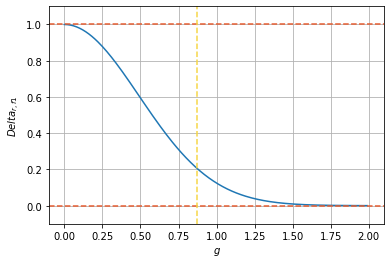

In [587]:
#Delta_r 1st parametrization
plt.plot(g,Delta_r_final_param1)
#np.save("Delta_r_p1_M100",Delta_r_final_param1)
plt.xlabel('$g$')
plt.ylabel('$Delta_{r,f1}$')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,1.1)
plt.axhline(0,c=c3,linestyle='--')
plt.axhline(1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

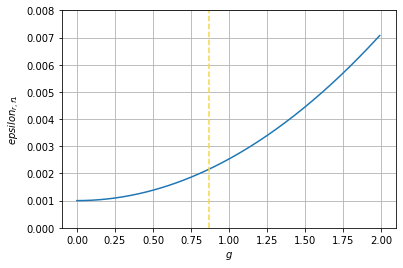

In [588]:
#epsilon_r 1st parametrization
plt.plot(g,epsilon_r_final_param1)
#np.save("epsilon_r_p1_M100",epsilon_r_final_param1)
plt.xlim(-0.1,2.1)
plt.ylim(0,0.008)
plt.xlabel('$g$')
plt.ylabel('$epsilon_{r,f1}$')
plt.axvline(0.87,c=c4,linestyle='--')
plt.axhline(0.22,c=c4,linestyle='--')
plt.grid()
plt.show()

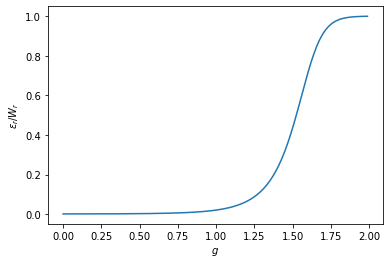

In [589]:
plt.plot(g,eps_W1)
#np.save("er_Wr_p1_M30",eps_W1)
plt.xlabel('$g$')
plt.ylabel('$\epsilon_r / W_r$')
plt.show()

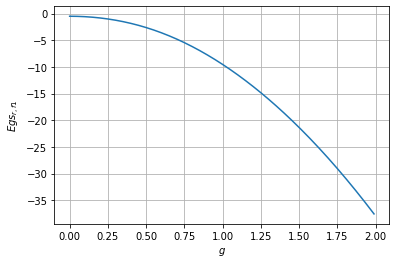

In [590]:
#E_gs 1st parametrization
plt.plot(g,E_gs_final_param1)
np.save("EGS_p1_M20",E_gs_final_param1)
plt.xlabel('$g$')
plt.ylabel('$Egs_{r,f1}$')
plt.grid()
plt.show()

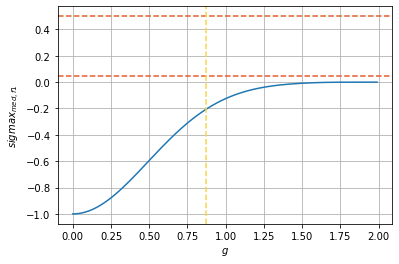

In [591]:
#sigma_x_med 1st parametrization
plt.plot(g,sigma_x_med_param1)
np.save("sigma_x_p1_M20",sigma_x_med_param1)
#plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmax_{med,f1}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3, linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

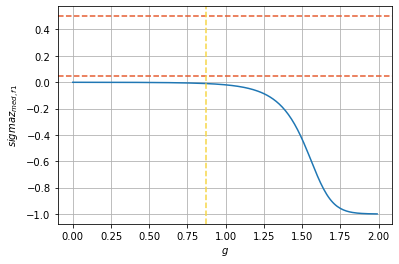

In [592]:
#sigma_z_med 1st parametrization
plt.plot(g,sigma_z_med_param1)
np.save("sigma_z_p1_M20",sigma_z_med_param1)
#plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmaz_{med,f1}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3, linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

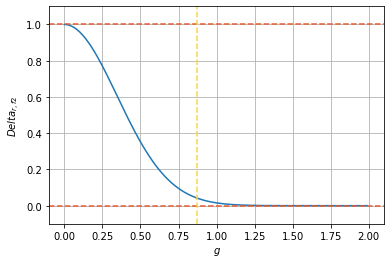

In [593]:
#Delta_r 2nd parametrization
plt.plot(g,Delta_r_final_param2)
#np.save("Delta_r_p2_M100",Delta_r_final_param2)
plt.xlabel('$g$')
plt.ylabel('$Delta_{r,f2}$')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,1.1)
plt.axhline(0,c=c3,linestyle='--')
plt.axhline(1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

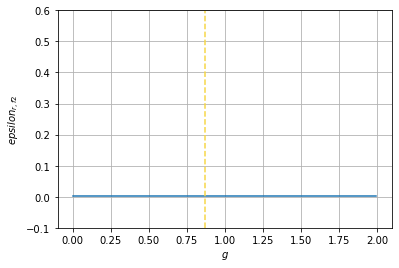

In [594]:
#epsilon_r 2nd parametrization
plt.plot(g,epsilon_r_final_param2)
#np.save("epsilon_r_p2_M1000",epsilon_r_final_param2)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$epsilon_{r,f2}$')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

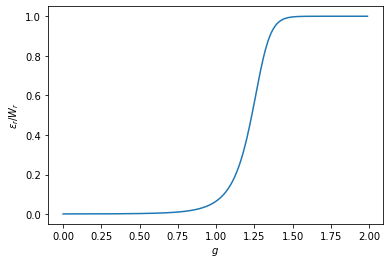

In [595]:
plt.plot(g,eps_W2)
#np.save("er_Wr_p2_M30",eps_W2)
plt.xlabel('$g$')
plt.ylabel('$\epsilon_r / W_r$')
plt.show()

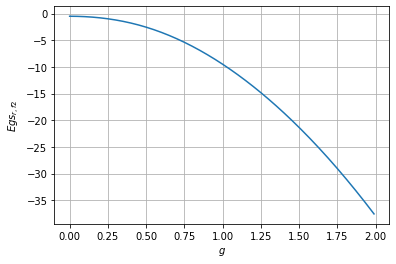

In [596]:
#E_gs 2nd parametrization
plt.plot(g,E_gs_final_param2)
#np.save("EGS_p2_M100",E_gs_final_param2)
#np.save("EGS_p2_M10_renormalized_prueba",E_gs_final_param2)
plt.xlabel('$g$')
plt.ylabel('$Egs_{r,f2}$')
plt.grid()
plt.show()

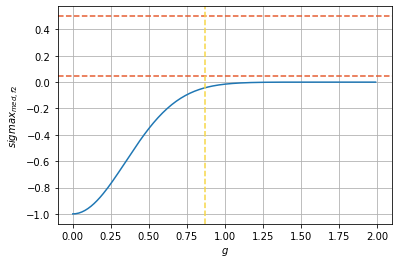

In [597]:
#sigma_x_med 2nd parametrization
plt.plot(g,sigma_x_med_param2)
#np.save("sigma_x_p2_M1",sigma_x_med_param2)
plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmax_{med,f2}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

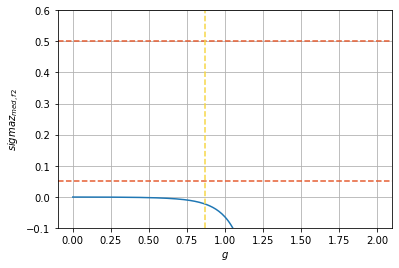

In [598]:
#sigma_z_med 2nd parametrization
plt.plot(g,sigma_z_med_param2)
#np.save("sigma_z_p2_M1000",sigma_x_med_param2)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmaz_{med,f2}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

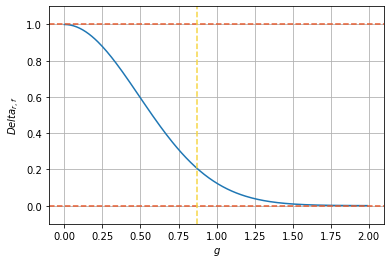

In [599]:
#Delta_r final
plt.plot(g,Delta_r_final)
plt.xlabel('$g$')
plt.ylabel('$Delta_{r,f}$')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,1.1)
plt.axhline(0,c=c3,linestyle='--')
plt.axhline(1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

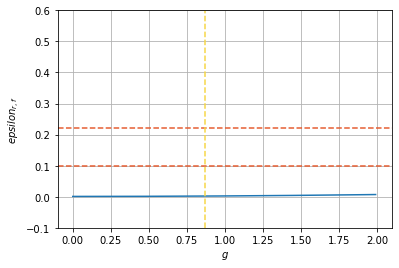

In [600]:
#epsilon_r
plt.plot(g,epsilon_r_final)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$epsilon_{r,f}$')
plt.axhline(0.22,c=c3,linestyle='--')
plt.axhline(0.1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

In [601]:
#E_gs
#plt.plot(g,E_gs_final)
#plt.xlabel('$g$')
#plt.ylabel('$Egs_{r,f}$')
#plt.grid()
#plt.show()

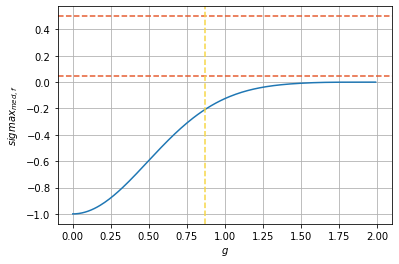

In [602]:
#sigma_x_med
plt.plot(g,sigma_x_med)
plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmax_{med,f}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3,linestyle='--')
plt.axvline(0.87,c=c4, linestyle='--')
plt.grid()
plt.show()

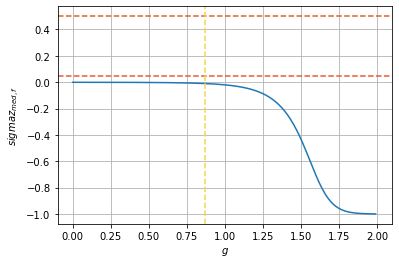

In [603]:
#sigma_z_med
plt.plot(g,sigma_z_med)
plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmaz_{med,f}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3,linestyle='--')
plt.axvline(0.87,c=c4, linestyle='--')
plt.grid()
plt.show()

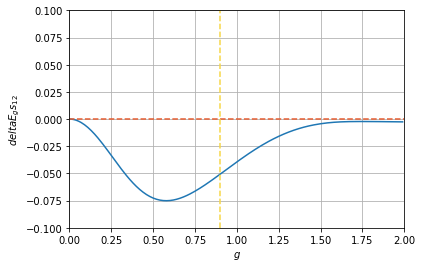

In [604]:
plt.plot(g,deltaE_gs_12)
#np.save("deltaE_gs_M100",deltaE_gs_12)
plt.xlim(0,2)
plt.ylim(-0.1,0.1)
plt.xlabel('$g$')
plt.ylabel('$deltaE_gs_{12}$')
plt.axhline(0,c=c3,linestyle='--')
plt.axvline(0.9,c=c4, linestyle='--')
plt.grid()
plt.show()

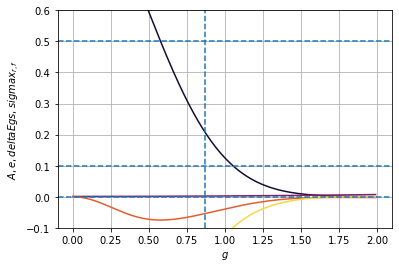

-0.07508191001493536


In [605]:
plt.plot(g,Delta_r_final,c=c1)
plt.plot(g,epsilon_r_final,c=c2)
plt.plot(g,deltaE_gs_12,c=c3)
plt.plot(g,sigma_x_med,c=c4)
plt.xlabel('$g$')
plt.ylabel('$A,e,deltaEgs,sigmax_{r,f}$')
plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,1.1)
plt.ylim(-0.1,0.6)
plt.axhline(0,linestyle='--')
plt.axhline(1,linestyle='--')
plt.axhline(0.5,linestyle='--')
plt.axhline(0.1, linestyle='--')
plt.axvline(0.87, linestyle='--')
plt.grid()
plt.show()
print(np.min(deltaE_gs_12))

In [606]:
Ar1=[]
Ar1_1=[]
Ar1_2=[]

Ar2=[]
Ar2_1=[]
Ar2_2=[]

Ars=np.arange(0,1,0.01)

for i in range(np.size(Ars)):
    
    Ar_local=Ars[i]
    
    res1=f_Delta_r_param1(m,0.2,Ar_local,epsilon)
    res1_1=f_Delta_r_param1(m,0.5,Ar_local,epsilon)
    res1_2=f_Delta_r_param1(m,0.8,Ar_local,epsilon)
    
    res2=f_Delta_r_param2(m,0.2,Ar_local,epsilon)
    res2_1=f_Delta_r_param2(m,0.5,Ar_local,epsilon)
    res2_2=f_Delta_r_param2(m,0.8,Ar_local,epsilon)
    
    Ar1.append(res1)
    Ar1_1.append(res1_1)
    Ar1_2.append(res1_2)
    
    Ar2.append(res2)
    Ar2_1.append(res2_1)
    Ar2_2.append(res2_2)

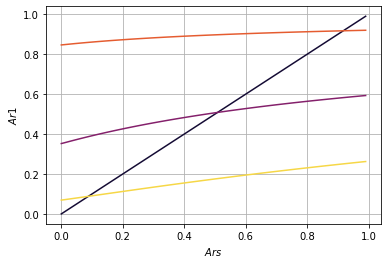

In [607]:
plt.plot(Ars,Ars,c=c1)
plt.plot(Ars,Ar1,c=c3)
plt.plot(Ars,Ar1_1,c=c2)
plt.plot(Ars,Ar1_2,c=c4)
#plt.ylim(0.8,1) #para Ar1 - g=0.2
#plt.ylim(0.2,0.5) #para Ar1_1 - g=0.5
#plt.ylim(0,0.2) #para Ar1_2 - g=0.8
plt.xlabel('$Ars$')
plt.ylabel('$Ar1$')
plt.grid()
plt.show()

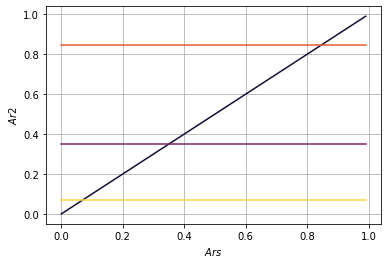

In [608]:
plt.plot(Ars,Ars,c=c1)
plt.plot(Ars,Ar2,c=c3)
plt.plot(Ars,Ar2_1,c=c2)
plt.plot(Ars,Ar2_2,c=c4)
plt.xlabel('$Ars$')
plt.ylabel('$Ar2$')
plt.grid()
plt.show()